In [1]:
Claims = read.csv("ClaimsData.csv")

In [2]:
str(Claims)

'data.frame':	458005 obs. of  16 variables:
 $ age              : int  85 59 67 52 67 68 75 70 67 67 ...
 $ alzheimers       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ arthritis        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cancer           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ copd             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ depression       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ diabetes         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ heart.failure    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ihd              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ kidney           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ osteoporosis     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ stroke           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ reimbursement2008: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2008       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ reimbursement2009: int  0 0 0 0 0 0 0 0 0 0 ...
 $ bucket2009       : int  1 1 1 1 1 1 1 1 1 1 ...


In [3]:
table(Claims$bucket2009)/nrow(Claims)


          1           2           3           4           5 
0.671267781 0.190170413 0.089466272 0.043324855 0.005770679 

In [4]:
library(caTools)

In [5]:
set.seed(88)

In [6]:
split = sample.split(Claims$bucket2009, SplitRatio = 0.6 )

In [7]:

claimsTrain = subset(Claims, split == TRUE)
str(claimsTrain)

In [8]:
claimsTest = subset(Claims, split == FALSE)

In [9]:
mean(claimsTrain$age)

[1] 72.63773

In [10]:
mean(claimsTrain$diabetes)

[1] 0.3808983

The baseline method would predict
that the cost bucket for a patient in 2009
will be the same as it was in 2008.
So let's create a classification matrix to compute the accuracy
for the baseline method on the test set.


In [14]:
t=table(claimsTest$bucket2009, claimsTest$bucket2008)
t

   
         1      2      3      4      5
  1 110138   7787   3427   1452    174
  2  16000  10721   4629   2931    559
  3   7006   4629   2774   1621    360
  4   2688   1943   1415   1539    352
  5    293    191    160    309    104

In [15]:
(110138+10721+2774+1539+104)/(sum(t))

[1] 0.6838135

In [16]:
diag(t)

1      2      3      4      5 
110138  10721   2774   1539    104

In [17]:
sum(diag(t))/sum(t)

[1] 0.6838135

In [18]:
PenaltyMatrix = matrix(c(0,1,2,3,4,2,0,1,2,3,4,2,0,1,2,6,4,2,0,1,8,6,4,2,0), byrow = TRUE, nrow = 5)

In [19]:
PenaltyMatrix

0,1,2,3,4
2,0,1,2,3
4,2,0,1,2
6,4,2,0,1
8,6,4,2,0


In [22]:
names(PenaltyMatrix) = list(c('act_buck1','act_buck2','act_buck3','act_buck4','act_buck5'), c('pred_buck1','pred_buck2','pred_buck3','pred_buck4','pred_buck5'))

In [23]:
PenaltyMatrix

0,1,2,3,4
2,0,1,2,3
4,2,0,1,2
6,4,2,0,1
8,6,4,2,0


In [24]:
rownames(PenaltyMatrix) = c('act_buck1','act_buck2','act_buck3','act_buck4','act_buck5')

In [25]:
PenaltyMatrix

act_buck1,0,1,2,3,4
act_buck2,2,0,1,2,3
act_buck3,4,2,0,1,2
act_buck4,6,4,2,0,1
act_buck5,8,6,4,2,0


In [26]:
colnames(PenaltyMatrix)=c('pred_buck1','pred_buck2','pred_buck3','pred_buck4','pred_buck5')

In [27]:
PenaltyMatrix

,pred_buck1,pred_buck2,pred_buck3,pred_buck4,pred_buck5
act_buck1,0,1,2,3,4
act_buck2,2,0,1,2,3
act_buck3,4,2,0,1,2
act_buck4,6,4,2,0,1
act_buck5,8,6,4,2,0


In [28]:
t*PenaltyMatrix

   
        1     2     3     4     5
  1     0  7787  6854  4356   696
  2 32000     0  4629  5862  1677
  3 28024  9258     0  1621   720
  4 16128  7772  2830     0   352
  5  2344  1146   640   618     0

In [29]:
sum(t*PenaltyMatrix)/nrow(claimsTest)

[1] 0.7386055

Suppose that instead of the baseline method discussed in the previous video, we used the baseline method of predicting the most frequent outcome for all observations. This new baseline method would predict cost bucket 1 for everyone. 

In [32]:
sort(table(claimsTrain$bucket2009))

5      4      3      2      1 
  1586  11906  24586  52259 184466

In [34]:
one(5)

ERROR: Error in eval(expr, envir, enclos): could not find function "one"


In [35]:
baseLine1 = rep(1,nrow(claimsTest))

In [39]:
t2 = table(claimsTest$bucket2009,baseLine1)
t2

   baseLine1
         1
  1 122978
  2  34840
  3  16390
  4   7937
  5   1057

In [40]:
122978/(sum(t2))

[1] 0.67127

In [44]:
sum(t2*PenaltyMatrix[,1])/nrow(claimsTest)

[1] 1.044301

In [45]:
library(rpart)

In [46]:
library(rpart.plot)

Warning message:
: package ‘rpart.plot’ was built under R version 3.3.0

In [47]:
names(claimsTest)

[1] "age"               "alzheimers"        "arthritis"        
 [4] "cancer"            "copd"              "depression"       
 [7] "diabetes"          "heart.failure"     "ihd"              
[10] "kidney"            "osteoporosis"      "stroke"           
[13] "reimbursement2008" "bucket2008"        "reimbursement2009"
[16] "bucket2009"

In [51]:
ClaimsTree = rpart(bucket2009~age + alzheimers + arthritis + cancer + copd + depression + diabetes + heart.failure + ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, data=claimsTrain, method = "class", cp =0.00005)

Warning message:
: labs do not fit even at cex 0.15, there may be some overplotting

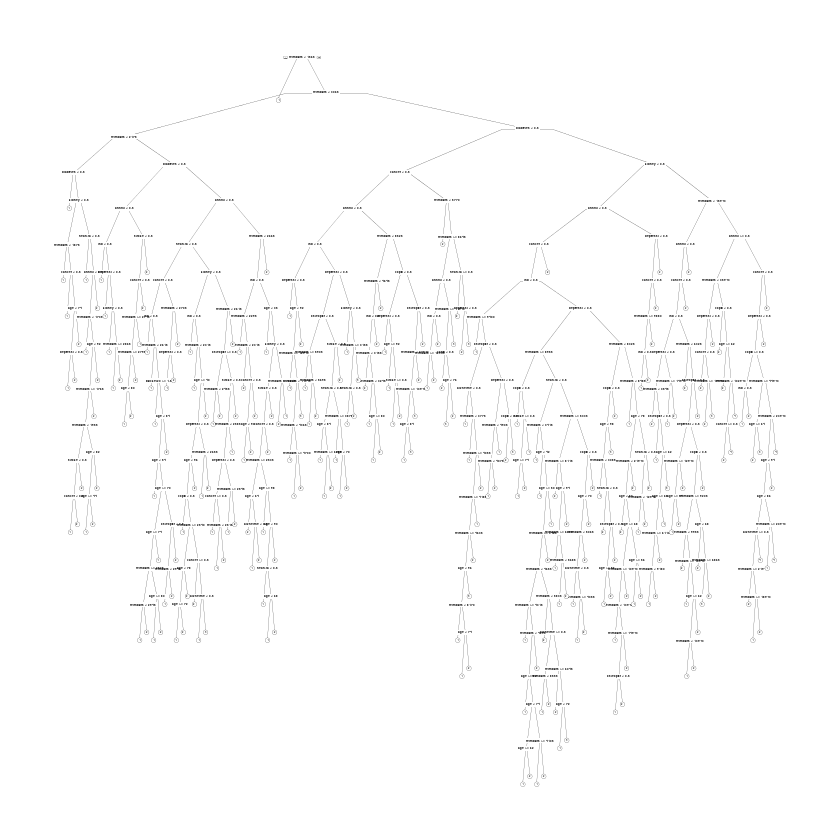

In [52]:
prp(ClaimsTree)

In [53]:
PredictTest = predict(ClaimsTree, newdata = claimsTest, type = "class")

In [54]:
tPred1 = table(claimsTest$bucket2009, PredictTest)
tPred1

   PredictTest
         1      2      3      4      5
  1 114141   8610    124    103      0
  2  18409  16102    187    142      0
  3   8027   8146    118     99      0
  4   3099   4584     53    201      0
  5    351    657      4     45      0

In [55]:
sum(diag(tPred1))/sum(tPred1)

[1] 0.7126669

In [57]:
sum(tPred1*PenaltyMatrix)/nrow(claimsTest)

[1] 0.7578902

In [59]:
ClaimsTree = rpart(bucket2009~age + alzheimers + arthritis + cancer + copd + depression + diabetes + heart.failure + ihd + kidney + osteoporosis + stroke + bucket2008 + reimbursement2008, data=claimsTrain,
                   method = "class", cp =0.00005, parms = list(loss = PenaltyMatrix))

In [60]:
PredictTest2 = predict(ClaimsTree,newdata = claimsTest,type = "class")

In [61]:
tPred2 = table(claimsTest$bucket2009,PredictTest2)
tPred2

   PredictTest2
        1     2     3     4     5
  1 94310 25295  3087   286     0
  2  7176 18942  8079   643     0
  3  3590  7706  4692   401     1
  4  1304  3193  2803   636     1
  5   135   356   408   156     2

In [62]:
sum(diag(tPred2))/sum(tPred2)

[1] 0.6472746

In [63]:
sum(tPred2*PenaltyMatrix)/nrow(claimsTest)

[1] 0.6418161

In [66]:
sum(tPred1[,1])/nrow(claimsTest)

[1] 0.786165

In [67]:
sum(tPred2[,1])/nrow(claimsTest)

[1] 0.5814074